In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# !pip install protobuf==3.20.0


In [3]:
# !pip uninstall tensorflow tensorflow-gpu keras

In [4]:
# !pip install --upgrade tensorflow

In [5]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [6]:
data = pd.read_csv('../data/raw_postpro.csv')
# 컬럼 삭제
df = data.drop(['청구서번호','No.',  '선박입고','완료 여부','리드타임_음수제거','청구량','견적','견적수량','견적화폐','견적단가','발주번호','발주','발주수량','발주금액','미입고 기간','리드타임','창고입고','창고입고수량','입고창고','창고출고','창고출고수량','출고선박','출고운반선','선박입고','선박입고수량','완료 여부'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject      20517 non-null  object
 1   Machinery    20517 non-null  object
 2   Assembly     20517 non-null  object
 3   청구품목         20517 non-null  object
 4   Part No.1    20517 non-null  object
 5   Part No.2    20517 non-null  object
 6   key1         20517 non-null  object
 7   key2         20517 non-null  object
 8   발주처          20517 non-null  object
 9   D/T          20517 non-null  object
 10  Control No.  20517 non-null  object
 11  leadtime     20517 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [8]:
df = df[['청구품목','발주처','Machinery', 'Assembly' , "Part No.1", "Part No.2",'key2']]
# 'Machinery', 'Assembly', '청구품목', 'Part No.1', 'Part No.2', 'key1', '발주처'

In [9]:
delete_list = ['COMPRESSOR', 'SEAT', 'TURBINE', 'LINE', 'ANODES', 'DAMPER', 'CARD', 'BELT', 'ARM', 'SWITCH',
 'CLIP', 'BATTERY', 'ADAPTER', 'TOOL', 'CONTROL', 'BRAKE', 'TRANSFORMER', 'WINCH']
df = df[~df['key2'].isin(delete_list)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19367 entries, 0 to 20516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   청구품목       19367 non-null  object
 1   발주처        19367 non-null  object
 2   Machinery  19367 non-null  object
 3   Assembly   19367 non-null  object
 4   Part No.1  19367 non-null  object
 5   Part No.2  19367 non-null  object
 6   key2       19367 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [11]:
from sklearn import preprocessing
label_encoders = {}  # 각 열에 대한 LabelEncoder를 저장하기 위한 딕셔너리
columns_to_encode = ['key2']  # 인코딩을 수행할 열의 이름 리스트

for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    label_encoders[column] = le # 딕셔너리에 저장
    df[column+"_encoded"] = le.transform(df[column]) # 새로운 encoding 된 컬럼 추가

In [12]:
df = df.drop(['key2'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19367 entries, 0 to 20516
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   청구품목          19367 non-null  object
 1   발주처           19367 non-null  object
 2   Machinery     19367 non-null  object
 3   Assembly      19367 non-null  object
 4   Part No.1     19367 non-null  object
 5   Part No.2     19367 non-null  object
 6   key2_encoded  19367 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 1.1+ MB


In [14]:
# df_desc = df[[ '청구품목', '발주처']].apply(lambda row: ' '.join(row), axis=1)
df_desc = df[[ '청구품목', '발주처','Machinery', "Part No.1", "Part No.2"]].apply(lambda row: ' '.join(row), axis=1)

In [15]:
lis = df_desc.values

In [16]:
cnt = 0
for i in lis:
    print(i)
    cnt += 1
    if cnt == 20:
        break

SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 7.00E-275 0
OIL COOLER & LINES HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 7.00E-275 0
WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 7.00E-275 0
BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 7.00E-275 0
SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 7.00E-275 0
CORE CHARGES FOR CYLINDER PACK AS HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 7.00E-275 0
PUMP GP-F TFR-REMAN HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 7.00E-275 0
IMPELLER (주)정원

In [17]:
desc = df_desc.to_frame()

In [18]:
desc['key2'] = df['key2_encoded']

In [19]:
desc

0  key2
0      SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1...     8
1      OIL COOLER & LINES HAEIN Coporation_Cheonan NO...     8
2      WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR...     8
3      BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 G...     8
4      SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR E...     8
...                                                  ...   ...
20511  CORRO, ELIMINATOR+PLUG FOR OIL COOLER MARINE H...     8
20512  HYD. CYLINDER_NET BOAT DAVIT MARINE HYDROTEC C...    10
20513  HYD. CYLINDER_N.D CRANE_BOOM_LIFTER MARINE HYD...    10
20515  CYLINDER  PORT RELIEF ENGINEERING CO.,LTD. 7M ...    10
20516  SEAL KIT FOR CYLINDER PORT RELIEF ENGINEERING ...    10

[19367 rows x 2 columns]

In [20]:
desc.columns = ['origin','key2']

In [21]:
desc.head()

origin  key2
0  SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1...     8
1  OIL COOLER & LINES HAEIN Coporation_Cheonan NO...     8
2  WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR...     8
3  BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 G...     8
4  SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR E...     8

In [22]:
X = desc['origin'].values

In [23]:
y = desc['key2'].values

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
sequences[:3] # 상위 3개 샘플 출력

[[26, 24, 19, 174, 4, 5, 6, 3, 7, 8, 2, 231, 1178, 981, 1],
 [41, 170, 221, 4, 5, 6, 3, 38, 8, 2, 231, 1178, 981, 1],
 [58, 4, 5, 6, 3, 38, 8, 2, 231, 1178, 981, 1]]

In [25]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print('단어 집합(Vocabulary)의 크기 :',vocab_size)

단어 집합(Vocabulary)의 크기 : 10769


문장의 최대 길이 : 32
문장의 평균 길이 : 13.068002271905819


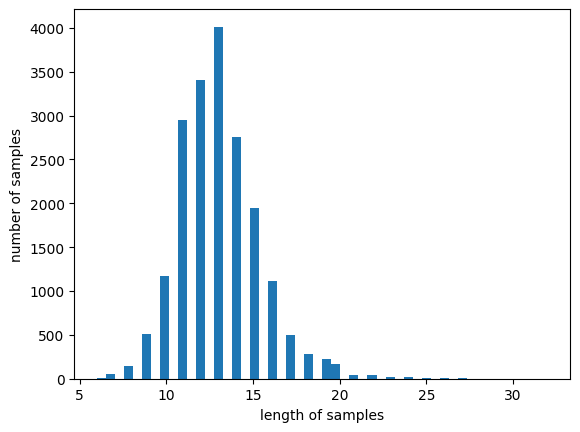

In [26]:
print('문장의 최대 길이 :',max(len(l) for l in sequences))
print('문장의 평균 길이 :',sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
# plt.savefig('text_length.png')  # 이미지 파일로 저장
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.2, random_state=42,shuffle=True)

In [28]:
# 딥러닝 모델을 만들기 위해 categorical 함수 사용
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=43)
# y_train_categorical = to_categorical(np.asarray(y_train))
# to_categorical(np.asarray(label_train))
y_test_categorical = to_categorical(y_test, num_classes=43)
# y_test_categorical = to_categorical(np.asarray(y_test))

In [29]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
# 시퀀스 사용
max_len = 33

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
print('훈련 데이터의 크기(shape):', X_train.shape)
print('훈련 데이터 레이블의 크기(shape):', y_train_categorical.shape)

훈련 데이터의 크기(shape): (15493, 33)
훈련 데이터 레이블의 크기(shape): (15493, 43)


In [31]:
print('훈련 데이터의 첫번째 샘플 :',X_train[0])
print('훈련 데이터의 첫번째 샘플의 레이블 :',y_train_categorical[0])

훈련 데이터의 첫번째 샘플 : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  60
 103  59 149  48  14   4   5   6   3  32   8   2  97 426   1]
훈련 데이터의 첫번째 샘플의 레이블 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
# indices = np.arange(X_train.shape[0])
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [13514  7571 15240 ...  2236  6105  6648]


In [33]:
len(indices)

15493

In [34]:
X_train = X_train[indices]
y_train_categorical = y_train_categorical[indices]

In [35]:
n_of_val = int(0.1 * X_train.shape[0])
print('검증 데이터의 개수 :',n_of_val)

검증 데이터의 개수 : 1549


In [36]:
X_train = X_train[:-n_of_val]
y_train_categorical = y_train_categorical[:-n_of_val]
X_val = X_train[-n_of_val:]
y_val = y_train_categorical[-n_of_val:]

In [37]:
print('훈련 데이터의 크기(shape):', X_train.shape)
print('훈련 데이터 레이블의 크기(shape):', y_train_categorical.shape)

훈련 데이터의 크기(shape): (13944, 33)
훈련 데이터 레이블의 크기(shape): (13944, 43)


In [38]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 120
hidden_units = 64
num_classes = 43 # 61

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.1))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train_categorical, batch_size=128, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
109/109 [==============================] - 4s 10ms/step - loss: 3.1342 - acc: 0.2315 - val_loss: 2.7327 - val_acc: 0.2931
Epoch 2/30
109/109 [==============================] - 1s 7ms/step - loss: 2.1916 - acc: 0.4520 - val_loss: 1.7057 - val_acc: 0.5752
Epoch 3/30
109/109 [==============================] - 1s 7ms/step - loss: 1.3077 - acc: 0.7020 - val_loss: 0.9526 - val_acc: 0.7889
Epoch 4/30
109/109 [==============================] - 1s 7ms/step - loss: 0.7186 - acc: 0.8535 - val_loss: 0.4955 - val_acc: 0.9103
Epoch 5/30
109/109 [==============================] - 1s 7ms/step - loss: 0.4069 - acc: 0.9277 - val_loss: 0.2826 - val_acc: 0.9593
Epoch 6/30
109/109 [==============================] - 1s 7ms/step - loss: 0.2398 - acc: 0.9646 - val_loss: 0.1676 - val_acc: 0.9845
Epoch 7/30
109/109 [==============================] - 1s 7ms/step - loss: 0.1515 - acc: 0.9806 - val_loss: 0.1056 - val_acc: 0.9897
Epoch 8/30
109/109 [==============================] - 1s 7ms/step - loss: 0

In [40]:

y_pred= model.predict(X_test)                    

122/122 [==============================] - 1s 2ms/step


In [41]:
model.evaluate(X_test, y_test_categorical)[1]

122/122 [==============================] - 0s 3ms/step - loss: 0.4252 - acc: 0.9298


0.92978835105896

In [42]:
# y_pred 랑 y_test 를 원래 labeling 된 데이터로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

In [43]:
y_pred_classes[:100],y_test_classes[:100]

(array([28, 39, 28, 32, 15, 13, 13, 13,  8, 12, 15, 14, 33, 13, 13, 13, 19,
         0,  0, 13, 42, 28, 23,  0, 41, 13, 16, 28, 13, 28, 33, 13, 33, 35,
        13, 13, 41,  0, 27, 28, 40, 40, 28, 10, 13,  0,  0, 15, 13,  0, 29,
        34, 13, 32, 15,  0, 33, 34, 13, 32, 13,  8, 13, 13, 13, 14, 13, 13,
        13, 37, 41,  0, 40, 13,  0, 40, 25, 25, 28, 13, 33, 13, 14, 13, 11,
        15,  9, 41, 40, 41, 36,  0, 41, 13,  0, 41, 22, 13, 32, 21],
       dtype=int64),
 array([28, 39, 28, 32, 15, 13, 13, 19,  8, 12, 24, 14, 33, 13, 41, 13, 19,
         0,  0, 13, 42, 28, 23,  0, 41,  2, 16, 28, 13, 28, 33, 32, 33, 35,
        13, 13, 41,  0, 27, 28, 40, 13, 18, 10, 13,  0,  0, 15, 13,  0, 29,
        34, 13, 32, 15,  0, 33, 34, 13, 32, 13,  8, 13, 13, 13, 14, 13, 13,
        13, 37, 41,  0, 40, 13,  0, 40, 25, 25, 28, 28, 33, 13, 14, 13, 11,
        15,  9, 13, 40, 41, 36,  0, 41, 13,  0, 13, 22, 13, 32, 21],
       dtype=int64))

In [44]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,classification_report
# from seqeval.metrics import f1_score, classification_report
f1 = f1_score(y_pred_classes, y_test_classes, average='macro')
f1

0.9193923056393444

In [45]:
print(classification_report(y_pred_classes, y_test_classes))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       221
           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92        18
           3       0.96      0.89      0.92       214
           4       0.90      0.98      0.94        48
           5       0.92      1.00      0.96        33
           6       0.93      0.88      0.90        32
           7       0.81      0.92      0.86        24
           8       0.95      0.91      0.93        82
           9       0.79      0.87      0.83        71
          10       0.92      0.91      0.92        91
          11       0.89      1.00      0.94        17
          12       0.89      0.93      0.91        72
          13       0.95      0.90      0.92       836
          14       0.96      0.96      0.96       140
          15       0.86      0.91      0.88        76
          16       0.64      0.82      0.72        11
          17       0.93    

In [46]:
'청구품목', '발주처','Machinery', 'Assembly' , "Part No.1", "Part No.2"

('청구품목', '발주처', 'Machinery', 'Assembly', 'Part No.1', 'Part No.2')

In [47]:
string = "CORE CHARGES FOR CYLINDER PACK AS, HAEIN Coporation_Cheonan, NO.2 GENERATOR ENGINE, 8N-6224 PISTON GP-ROD&, 7E-275, 0"

In [48]:
strings = ["DEO-E-210512-01", "0", "COOLER", "2N4727 INSTRUMNT PANEL GP", "KRW", "HAEIN Coporation_Cheonan"]
combined_string = " ".join(strings)
type(combined_string)

str

In [49]:
string = "CORE CHARGES FOR CYLINDER PACK AS HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 8N-6224 PISTON GP-ROD& 7E-275 0"

# 문자열을 정수 시퀀스로 변환
combined_sequence = tokenizer.texts_to_sequences([string])

In [50]:
# combined_sequence
max_len = 36

X_train = pad_sequences(X_train, maxlen = max_len)

In [51]:
# 시퀀스 패딩
combined_padded_sequence = pad_sequences(combined_sequence, maxlen = max_len)

# 예측
y_pred = model.predict(combined_padded_sequence)

1/1 [==============================] - 0s 260ms/step


In [52]:
# y_pred
y_pred = np.argmax(y_pred, axis=1)

In [53]:
y_pred

array([29], dtype=int64)

In [54]:
label_encoders['key2']

LabelEncoder()

In [55]:
y_pred_result = label_encoders['key2'].inverse_transform(y_pred)

In [56]:
y_pred_result

array(['PIN'], dtype=object)

In [57]:
import pickle

# tokenizer pkl 파일로 저장
# with open("../model/tokenizer_06261.pkl", "wb") as file:
#     pickle.dump(tokenizer, file)

In [58]:
# import pickle

# # tokenizer pkl 파일로 저장
# with open("../model/labelencoder_06261.pkl", "wb") as file:
#     pickle.dump( label_encoders['key2'], file)

In [59]:
# # 모델 저장
# model.save("../model/model_regression_06261.h5")

In [60]:
# import joblib
# joblib.dump(model, '../model/model_classification.pkl')

In [61]:
# !pip install flask

In [62]:
# import pickle
# # 모델을 pickle 파일로 저장
# with open('../model/model_classification.pkl', 'wb') as f:
#     pickle.dump(model, f)